Universidad del Valle de Guatemala

Facultad de Ingeniería

Departamento de Ciencias de la Computación

Data Science - Sección 10

Grupo 2

In [102]:
# Librerías a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [103]:
# Cargar data
data_frame = pd.read_csv('risk_factors_cervical_cancer.csv')
data_frame.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [104]:
# Se visualizara los valores unicos de cada campo
for i in data_frame:
    print(f"\n=> {i}")
    print(data_frame[i].unique())


=> Age
[18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]

=> Number of sexual partners
['4.0' '1.0' '5.0' '3.0' '2.0' '6.0' '?' '7.0' '15.0' '8.0' '10.0' '28.0'
 '9.0']

=> First sexual intercourse
['15.0' '14.0' '?' '16.0' '21.0' '23.0' '17.0' '26.0' '20.0' '25.0' '18.0'
 '27.0' '19.0' '24.0' '32.0' '13.0' '29.0' '11.0' '12.0' '22.0' '28.0'
 '10.0']

=> Num of pregnancies
['1.0' '4.0' '2.0' '6.0' '3.0' '5.0' '?' '8.0' '7.0' '0.0' '11.0' '10.0']

=> Smokes
['0.0' '1.0' '?']

=> Smokes (years)
['0.0' '37.0' '34.0' '1.266972909' '3.0' '12.0' '?' '18.0' '7.0' '19.0'
 '21.0' '15.0' '13.0' '16.0' '8.0' '4.0' '10.0' '22.0' '14.0' '0.5' '11.0'
 '9.0' '2.0' '5.0' '6.0' '1.0' '32.0' '24.0' '28.0' '20.0' '0.16']

=> Smokes (packs/year)
['0.0' '37.0' '3.4' '2.8' '0.04' '0.5132021277' '2.4' '6.0' '?' '9.0'
 '1.6' '19.0' '21.0' '0.32' '2.6' '0.8' '15.0' '2.0' '5.7' '1.0' '3.3'
 '3.5' '12.0' '0.025' '2.75' '0.2' '1

In [105]:
# Limpieza de datos

for i in data_frame:
    # Convertir los datos invalidos en -1
    # Tambien se pasaran los valores a numeros flotantes
    data_frame[i] = data_frame[i].replace('?', -1).astype(float)


In [106]:
# Se visualizara los valores unicos de cada campo
for i in data_frame:
    print(f"\n=> {i}")
    print(data_frame[i].unique())


=> Age
[18. 15. 34. 52. 46. 42. 51. 26. 45. 44. 27. 43. 40. 41. 39. 37. 38. 36.
 35. 33. 31. 32. 30. 23. 28. 29. 20. 25. 21. 24. 22. 48. 19. 17. 16. 14.
 59. 79. 84. 47. 13. 70. 50. 49.]

=> Number of sexual partners
[ 4.  1.  5.  3.  2.  6. -1.  7. 15.  8. 10. 28.  9.]

=> First sexual intercourse
[15. 14. -1. 16. 21. 23. 17. 26. 20. 25. 18. 27. 19. 24. 32. 13. 29. 11.
 12. 22. 28. 10.]

=> Num of pregnancies
[ 1.  4.  2.  6.  3.  5. -1.  8.  7.  0. 11. 10.]

=> Smokes
[ 0.  1. -1.]

=> Smokes (years)
[ 0.         37.         34.          1.26697291  3.         12.
 -1.         18.          7.         19.         21.         15.
 13.         16.          8.          4.         10.         22.
 14.          0.5        11.          9.          2.          5.
  6.          1.         32.         24.         28.         20.
  0.16      ]

=> Smokes (packs/year)
[ 0.00000000e+00  3.70000000e+01  3.40000000e+00  2.80000000e+00
  4.00000000e-02  5.13202128e-01  2.40000000e+00  6.00000000e+0

#### 1. Análisis Exploratorio

In [107]:
# Vamos a examinar cuantos pacientes tienen diagnosticos y ver si también tienen diagnosticos donde
# al paciente se le detecto cancer, se obtendrá la proporción de los casos positivos.
diagnostic_count = data_frame['Dx'].value_counts()

total_samples = data_frame.shape[0]
proportions = diagnostic_count / total_samples

print("Proporciones de diagnosticos:")
print(proportions)

Proporciones de diagnosticos:
0.0    0.972028
1.0    0.027972
Name: Dx, dtype: float64


In [108]:
# Ahora es el turno de diagnosticos donde al paciente se le detecto cancer.
diagnostic_count_cancer = data_frame['Dx:Cancer'].value_counts()

proportions_cancer = diagnostic_count_cancer / total_samples

print("Proporciones de diagnosticos donde se detecto cancer:")
print(proportions_cancer)

Proporciones de diagnosticos donde se detecto cancer:
0.0    0.979021
1.0    0.020979
Name: Dx:Cancer, dtype: float64


In [109]:
# Análisis de variables categóricas (si el paciente fuma, enfermedades de transmisión sexual
# o si tiene el virus del papiloma humano)
vars_to_analyze = ['Smokes', 'Hormonal Contraceptives', 'STDs', 'Dx:HPV']

for v in vars_to_analyze:
    count = data_frame[v].value_counts()
    proportions = count / total_samples

    print(f'{v}:\n{proportions}\n')
    

Smokes:
 0.0    0.841492
 1.0    0.143357
-1.0    0.015152
Name: Smokes, dtype: float64

Hormonal Contraceptives:
 1.0    0.560606
 0.0    0.313520
-1.0    0.125874
Name: Hormonal Contraceptives, dtype: float64

STDs:
 0.0    0.785548
-1.0    0.122378
 1.0    0.092075
Name: STDs, dtype: float64

Dx:HPV:
0.0    0.979021
1.0    0.020979
Name: Dx:HPV, dtype: float64



In [110]:
data_frame['STDs:cervical condylomatosis'].value_counts()

 0.0    753
-1.0    105
Name: STDs:cervical condylomatosis, dtype: int64

In [111]:
diagnosctic_nic = data_frame['Dx:CIN'].value_counts()
print(diagnosctic_nic)

0.0    849
1.0      9
Name: Dx:CIN, dtype: int64


In [112]:
# Revisión de datos faltantes y/o desconocidos
data_frame.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [113]:
# Ahora revisión de datos invalidos -1
data_frame.apply(lambda d: d.value_counts().get(-1), axis=0)

Age                                     NaN
Number of sexual partners              26.0
First sexual intercourse                7.0
Num of pregnancies                     56.0
Smokes                                 13.0
Smokes (years)                         13.0
Smokes (packs/year)                    13.0
Hormonal Contraceptives               108.0
Hormonal Contraceptives (years)       108.0
IUD                                   117.0
IUD (years)                           117.0
STDs                                  105.0
STDs (number)                         105.0
STDs:condylomatosis                   105.0
STDs:cervical condylomatosis          105.0
STDs:vaginal condylomatosis           105.0
STDs:vulvo-perineal condylomatosis    105.0
STDs:syphilis                         105.0
STDs:pelvic inflammatory disease      105.0
STDs:genital herpes                   105.0
STDs:molluscum contagiosum            105.0
STDs:AIDS                             105.0
STDs:HIV                        

Como se puede observar se encontró que el 2% aproximado de los pacientes se les detecto cancer, el 14% de los pacientes han fumado, el 56% de los pacientes han utilizado metodos anticonceptivos hormonales. El 9% de los pacientes han sido detectados de ETS. El 2% de los pacientes han sido detectados con el virus del papiloma humano.

Se puede observar que hay 753 pacientes donde no han tenido condilomatosis cervical pero 105 datos son desconocidos. Mientras que en se encontraron que 849 pacientes NO se les detecto NIC mientras que SI se les detecto NIC.

Con respecto a los datos que no se registraron se convirtieron en valores -1, en la mayoría de las variables se encontraron varios valores sin registro, el más alto sid de 787 valores no registrados en **STDs: Time since first diagnosis** y **STDs: Time since last diagnosis**.

#### 2. Tipo de las Variables

Se cuentan con 36 variables y 859 datos. Acontinuación se detallará el tipo de variables presentadas en el dataframe.


**Age**: Describe la edad de la persona.

    Tipo: Cuantitativa Continua

**Number of sexual parters**: Describe cantidad de parejas sexuales del paciente.

    Tipo: Cuantitativa Discreta

**First sexual intercourse**: Describe edad que tuvo su primer encuentro sexual.

    Tipo: Cuantitativa Continua

**Num of pregnancies**: Cantidad de embarazos.

    Tipo: Cuantitativa Discreta

**Smokes**: Describe si el paciente fuma o no.

    Tipo: Categorica

**Smokes (years)**: Describe cantidad de años que lleva fumando.

    Tipo: Cuantitativa Continua

**Smokes (packs/years)**: Describe cajetillas de cigarrillos por año que el paciente fuma.

    Tipo: Cuantitativa Continua

**Hormonal Contraceptives**: Describe si usa anticonceptivos hormonales o no.

    Tipo: Categorica

**Hormonal Contraceptives (years)**: Describe cantidad de años que lleva usando anticonceptivos hormonales.

    Tipo: Cuantitativa Continua

**IUD**: Describe si se tiene colocado algún dispositivo intrauterino (DIU).

    Tipo: Categorica

**IUD (years)**: Cantidad de años que lleva usando un DIU.

    Tipo: Cuantitativa Continua

**STDs**: Si el paciente tiene enfermedades de transmisión sexual (ETS).

    Tipo: Cuantitativa Continua

**STDs (number)**: Describe cantidad de ETS que el paciente a tenido.

    Tipo: Cuantitativa

**STDs:condylomatosis**: Describe si el paciente ha tenido condilomatosis o no.

    Tipo: Categorica

**STDs:cervical condylomatosis**: Describe si el paciente ha tenido condilomatosis cervical.

    Tipo: Cualitativa

**STDs:vaginal condylomatosis**: Describe si el paciente ha tenido condilomatosis vaginal.

    Tipo: Cualitativa

**STDs:vulvo-perineal condylomatosis**: Describe Si el paciente ha tenido condilomatosis vulvo perineal.

    Tipo: Categorica

**STDs:syphilis**: Describe si ha tenido sífilis.

    Tipo: Categorica

**STDs:pelvic inflammatory disease**: Describe si ha tenido inflamaciones pélvicas.

    Tipo: Cualitativa

**STDs:genital herpes**: Describe si ha tenido herpes genital.

    Tipo: Cualitativa

**STDs:molluscum contagiosum**: Describe si el paciente ha tenido molusco contagioso.

    Tipo: Cualitativa

**STDs:AIDS**: Describe si el paciente tiene SIDA.

    Tipo: Cualitativa

**STDs:HIV**: Describe si el paciente tiene VIH.

    Tipo: Categorica

**STDs:Hepatitis B**: Describe si el paciente ha tenido o tiene hepatitis B.

    Tipo: Cualitativa

**STDs:HPV**: Describe si el paciente ha tenido o tiene Virus del Papiloma Humano.

    Tipo: Categorica

**STDs: Number of diagnosis**: Describe la cantidad de diagnósticos de ETS.

    Tipo: Cuantitativa Discreta

**STDs: Time since first diagnosis**: Describe el tiempo desde el primer diagnóstico.

    Tipo: Cualitativa

**STDs: Time since last diagnosis**: Describe el tiempo desde el último diagnóstico.

    Tipo: Cualitativa

**Dx:Cancer**: Describe si el paciente tiene diagnóstico de cáncer o no.

    Tipo: Categorica

**Dx:CIN**: Describe si el paciente tiene diagnóstico de NIC.

    Tipo: Categorica

**Dx:HPV**: Describe si el paciente tiene diagnóstico de Virus del Papiloma Humano.

    Tipo: Categorica

**Dx**: Describe si el paciente tiene un diagnóstico.

    Tipo: Categorica

**Hinselmann**: Describe si al paciente le hicieron colposcopía.

    Tipo: Categorica

**Schiller**: Describe si al paciente le hicieron la prueba de Schiller.

    Tipo: Categorica

**Citology**: Describe si al paciente le hicieron citología o no.

    Tipo: Categorica

**Biopsy**: Describe si al paciente le hicieron Biopsioa o no.

    Tipo: Categorica


Los valores invalidos que tienen '?' se pasaron a -1

#### 3. Gráficos Exploratorios

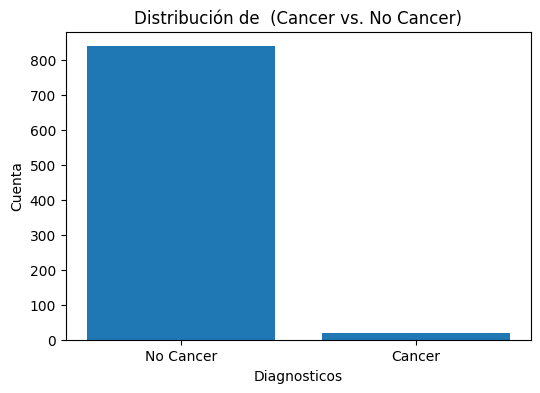

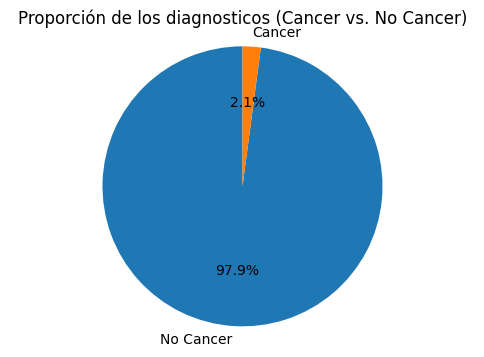

In [114]:
plt.figure(figsize=(6, 4))
plt.bar(diagnostic_count_cancer.index, diagnostic_count_cancer.values)
plt.xticks(diagnostic_count_cancer.index, ['No Cancer', 'Cancer'])
plt.xlabel('Diagnosticos')
plt.ylabel('Cuenta')
plt.title('Distribución de  (Cancer vs. No Cancer)')
plt.show()

# Visualizacion de los casos positivos y negativos
plt.figure(figsize=(6, 4))
plt.pie(proportions, labels=['No Cancer', 'Cancer'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proporción de los diagnosticos (Cancer vs. No Cancer)')
plt.show()

Como se podrá observar solo el 2.1% de los pacientes han sido detectados que tienen cancer.

##### Se analizaran directamente los casos de cancer cervical.

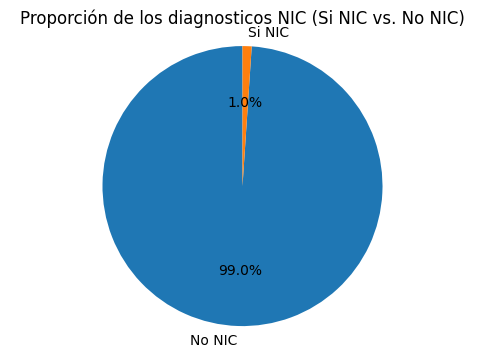

In [115]:
# Dx.CIN : Si tiene un diactostico de NIC
proportions_nic = diagnosctic_nic / total_samples

plt.figure(figsize=(6, 4))
plt.pie(proportions_nic, labels=['No NIC', 'Si NIC'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proporción de los diagnosticos NIC (Si NIC vs. No NIC)')
plt.show()

Se puede observar que el 1% de los pacientes fueron diagnosticados con NIC (Neoplasia Intraepitelial Cervical).

#### 4. Análisis de correlación

#### 5. Tablas de frecuencia, proporción, gráficas de barras, y otros para explorar los datos

#### 6. Determinar comportamiento

#### 7. Estudiar si es posible realizar transformaciones en las variables categóricas para incluirlas en el PCA

#### 8. ¿Es conveniente hacer un análisis de componentes principales

#### 9. Reglas de asociación interesantes del dataset (Discretizar las variables numéricas)